<a href="https://colab.research.google.com/github/Pravallika-Bollu/pravallika_INFO5731_Spring2021/blob/main/In_Class_exercises_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In class exercise 10 (20 points in total, 4/16/2021)

The purpose of the exercise is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 
    

In [6]:
#Write your code here.
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize  
import pandas as pd
from textblob import Word
import numpy as np 
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words=stopwords.words("english")
clean_text_review=[]
clean_text=[]
df=pd.read_csv("/content/Amazon_Unlocked_Mobile.csv")
df=df.dropna() 
input_df=df.sample(n = 25000)
input_df['cleaned text'] = input_df['Reviews'].str.replace(r"\W", " ").str.strip()
input_df['cleaned text'] = input_df['cleaned text'].str.replace(r'\d+',"") 
input_df['cleaned text'] = input_df['cleaned text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
input_df['cleaned text'] = input_df['cleaned text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words)) 
input_df['cleaned text'] = input_df['cleaned text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 
input_df['cleaned text']
input_df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,cleaned text
143164,BLU Studio 7.0 II -Unlocked Smartphone - US GS...,BLU,95.88,5.0,"I really like the phone, the only thing is it ...",0.0,really like phone thing said dual sim took cel...
157727,BLU Tank II T193 Unlocked GSM Dual-SIM Cell Ph...,BLU,18.93,5.0,excelente,0.0,excelente
153029,"BLU Studio M HD - 5.0"" Smartphone -Global GSM ...",BLU,489.00,4.0,Not too bad for the price!,0.0,bad price
222060,LG G3 D858 32GB White DUAL SIM GSM Factory Unl...,LG,259.98,5.0,5 stars!,1.0,star
214413,Lg G Pro Lite Dual D686 Black (Factory Unlocke...,LG,199.00,2.0,This Phone was really a bad experience for me....,10.0,phone really bad experience always ordered cel...
...,...,...,...,...,...,...,...
109739,BLU Dash JR 4.0 K Smartphone - Unlocked - Blue,BLU,99.99,1.0,Phone would not update - said no SD and would ...,0.0,phone would update said sd would download one ...
245924,Motorola Atrix MB860 4G Unlocked Dual Core Pho...,Motorola,98.40,1.0,"some parts of the screen do not work, the flas...",1.0,part screen work flash camera either dont reco...
266779,Nokia Lumia 1020 32GB Unlocked GSM Phone w/ 41...,Nokia,296.00,5.0,Very good. Value for money.,0.0,good value money
49874,"Apple iPhone 5s AT&T Cellphone, 16GB, Silver",Apple,139.95,5.0,Sweeeeeeeet,0.0,sweeeeeeeet


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_vectors = vectorizer.fit_transform(input_df['cleaned text'].values)


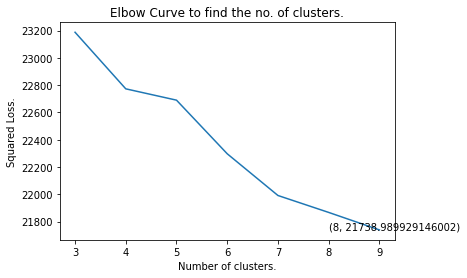

The optimal number of clusters obtained is -  8
The loss for optimal cluster is -  21738.989929146002


In [8]:
from sklearn.cluster import KMeans
number_of_clusters = [x for x in range(3, 10)]
squared_errors = []
for cluster in number_of_clusters:
    kmeans = KMeans(n_clusters = cluster).fit(tfidf_vectors)
    squared_errors.append(kmeans.inertia_)
optimal_clusters = np.argmin(squared_errors) + 2 
plt.plot(number_of_clusters, squared_errors)
plt.title("Elbow Curve to find the no. of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()
print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))


Silhouette Score:  0.04422432571618992
Kmeans_Cluster Labels
0     1074
1    10110
2     1029
3      646
4    10695
5      682
6      392
7      372
Name: Reviews, dtype: int64
Top terms per cluster:
Cluster 0: great
 phone
 work
 product
 price
 condition
 good
 fast
Cluster 1: excelente
 work
 product
 good
 ok
 like
 excelent
 great
Cluster 2: good
 phone
 product
 price
 far
 thanks
 work
 everything
Cluster 3: love
 phone
 great
 daughter
 wife
 new
 thanks
 son
Cluster 4: phone
 great
 good
 work
 one
 battery
 like
 screen
Cluster 5: excellent
 product
 phone
 seller
 price
 recommend
 condition
 good
Cluster 6: perfect
 condition
 work
 phone
 everything
 new
 thanks
 love
Cluster 7: nice
 phone
 price
 good
 product
 cellphone
 love
 watch


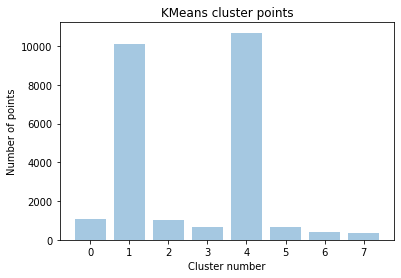

In [18]:

optimal_k = 8
model = KMeans(n_clusters = optimal_k)
model.fit(tfidf_vectors)
model_labels = model.labels_
cluster_centers = model.cluster_centers_
terms = vectorizer.get_feature_names()
from sklearn import metrics
silhouette_score = metrics.silhouette_score(tfidf_vectors, model_labels, metric='euclidean')
print('Silhouette Score: ', silhouette_score)
input_df['Kmeans_Cluster Labels'] = model_labels
print(input_df.groupby(['Kmeans_Cluster Labels'])['Reviews'].count())
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
for i in range(optimal_k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :optimal_k]:
        print(' %s' % terms[ind], end='')
        print()
plt.bar([x for x in range(optimal_k)], input_df.groupby(['Kmeans_Cluster Labels'])['Reviews'].count(),alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()


In [10]:
import gensim
import numpy as np
from sklearn.cluster import DBSCAN
minPts = 2 * 100
def lower_bound(nums, target):
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l
def compute200thnearestneighbour(x, data): 
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) 
        if(len(dists) == 200 and dists[199] > dist):
            l = int(lower_bound(dists, dist))
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    return dists[199]


In [12]:
review_list= []
for review in input_df['cleaned text'].values:
    review_list.append(review.split())

w2v_model=gensim.models.Word2Vec(review_list,size=100, workers=4)
review_vectors = []; 
for review in review_list: 
    review_vec = np.zeros(100) 
    cnt_words =0; 
    for word in review:
        try:
            vec = w2v_model.wv[word]
            review_vec += vec
            cnt_words += 1
        except:
            pass
    review_vec /= cnt_words
    review_vectors.append(review_vec)
review_vectors = np.array(review_vectors)
review_vectors = np.nan_to_num(review_vectors)
review_vectors.shape


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


(25000, 100)

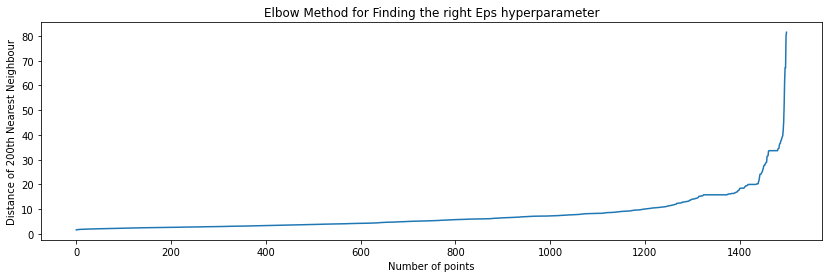

In [13]:
twohundrethneigh = []
for val in review_vectors[:1500]:
    twohundrethneigh.append( compute200thnearestneighbour(val, review_vectors[:1500]) )
twohundrethneigh.sort()
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()


In [14]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 15, min_samples = minPts).fit(review_vectors)
input_df['DBSCAN_Cluster Labels'] = dbscan.labels_
print(input_df.groupby(['DBSCAN_Cluster Labels'])['Reviews'].count())


DBSCAN_Cluster Labels
0    25000
Name: Reviews, dtype: int64


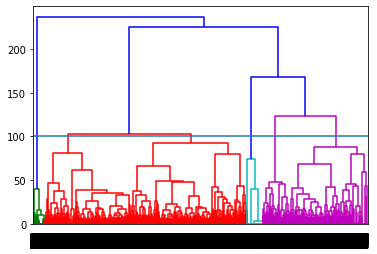

In [15]:
#Hierarchical clustering

import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(review_vectors,method='ward'))
plt.axhline(y=100)# cut at 100



In [16]:
from sklearn.cluster import AgglomerativeClustering 
h_clustering = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward') 
Agg=h_clustering.fit_predict(review_vectors)
labels= h_clustering.labels_
input_df['Hierarchical_Cluster Labels'] = labels
input_df.groupby(['Hierarchical_Cluster Labels'])['Reviews'].count()


Hierarchical_Cluster Labels
0    5788
1    1162
2    6354
3     903
4    2079
5    2608
6    6106
Name: Reviews, dtype: int64

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering. 

In [ ]:
#You can write you answer here.
K-means is a partition based clustering. It divides the data points into k number of groups. They are also called as clusters. They perform the operation based on Eucledian distance formula. Whereas D scan is a density based algorithm. This method follows a protocol that the neighbourhood points within the radius should have minimum number of points.This algorithm is efficient. In hierarchiical clustering, there is no fixed number of clusters. It is a set of nested clusters that are arranged as a tree. They can be applicable to any type of attributes.